# Data learning to predict

### Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

### Load the dataset

In [5]:
data_path = "/Users/nychanthrith/data-science-project/data/Clean data/cleaned_data_January.csv"
data = pd.read_csv(data_path)

### Data Exploration

In [6]:
print("Datset Info:")
data.info()

Datset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59790 entries, 0 to 59789
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   59790 non-null  int64  
 1   pH                      59790 non-null  float64
 2   Iron                    59790 non-null  float64
 3   Nitrate                 59790 non-null  float64
 4   Chloride                59790 non-null  float64
 5   Lead                    59790 non-null  float64
 6   Zinc                    59790 non-null  float64
 7   Color                   59790 non-null  int64  
 8   Turbidity               59790 non-null  float64
 9   Fluoride                59790 non-null  float64
 10  Copper                  59790 non-null  float64
 11  Odor                    59790 non-null  float64
 12  Sulfate                 59790 non-null  float64
 13  Conductivity            59790 non-null  float64
 14  Chlorine                5

### Basic statistics

In [7]:
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
              Index            pH          Iron       Nitrate      Chloride  \
count  5.979000e+04  59790.000000  59790.000000  59790.000000  59790.000000   
mean   5.239919e+05      7.455159      0.019393      1.872402      5.149811   
std    3.023917e+05      0.855354      0.027442      0.400410      0.345201   
min    2.000000e+00      3.033252      0.000000      0.351518      3.618146   
25%    2.631190e+05      6.919513      0.000008      1.599718      4.930092   
50%    5.238640e+05      7.459256      0.001981      1.878048      5.169117   
75%    7.858725e+05      8.008094      0.035323      2.145414      5.379465   
max    1.048566e+06     12.245415      0.079159      3.943200      7.067695   

                Lead          Zinc         Color     Turbidity      Fluoride  \
count   5.979000e+04  59790.000000  59790.000000  5.979000e+04  59790.000000   
mean    6.797064e-08      0.783505      3.283944  1.463524e-01      0.598558   
std     2.749762e-07      0.5

### Visualize distribution of pH and Color

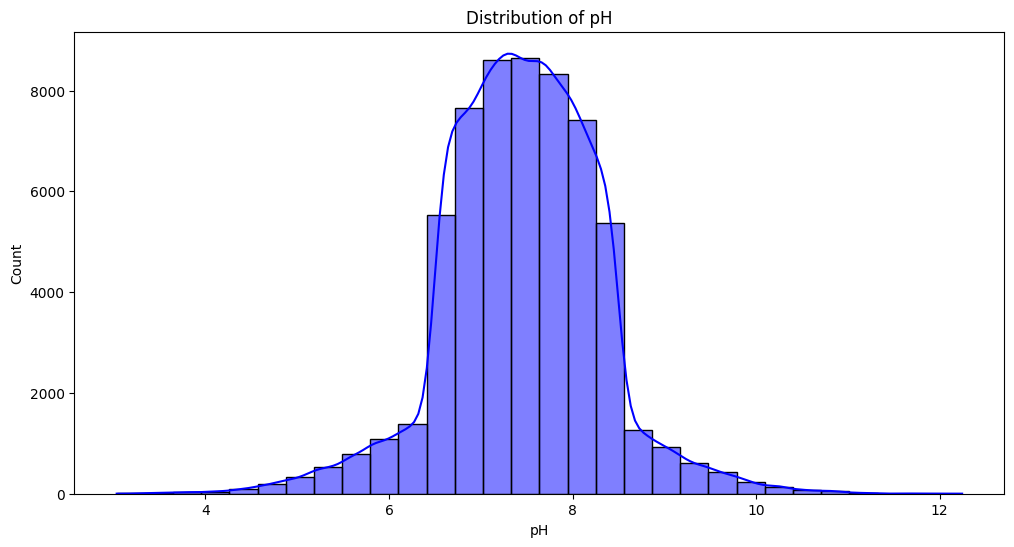

/var/folders/06/ft1dxlv91lvd0p040kkn9bsc0000gn/T/ipykernel_2670/1861114944.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["Color"], palette= 'viridis')


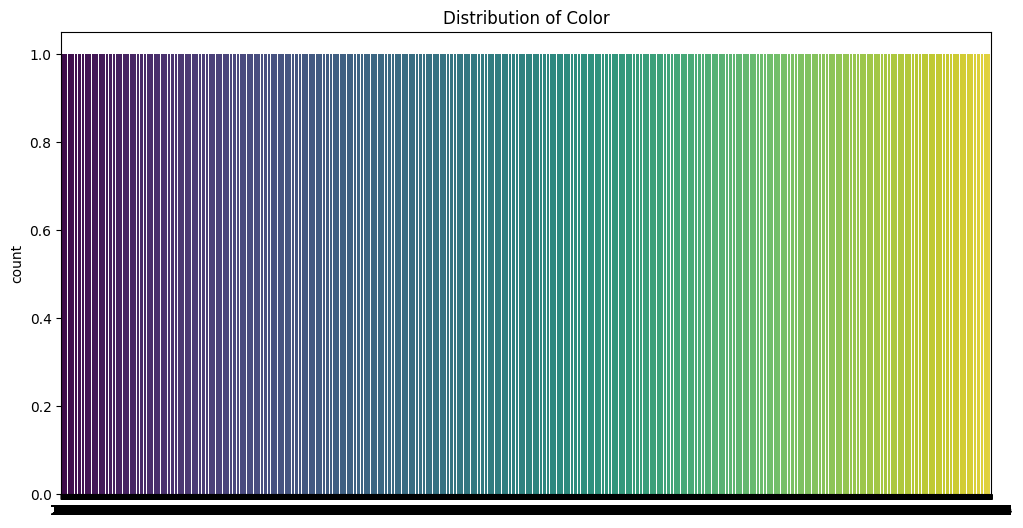

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(data['pH'], kde=True, bins=30, color='blue')
plt.title('Distribution of pH')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data["Color"], palette= 'viridis')
plt.title('Distribution of Color')
plt.show()

## Feature Selection

### Identify features and targets

In [9]:
features = data.drop(columns=['pH', 'Color', 'Index', 'Month', 'Target'])
target_pH = data['pH']
target_color = data['Color']

### Train-test split

In [10]:
X_train_ph, X_test_ph, y_train_ph, y_test_ph = train_test_split(features, target_pH, test_size=0.2, random_state=42)
X_train_color, X_test_color, y_train_color, y_test_color = train_test_split(features, target_color, test_size=0.2, random_state=42)

## Machine Learning for pH (Regression)

In [11]:
print("\nTraining RandomForestRegressor for pH prediction...")
model_ph = RandomForestRegressor( random_state=42)
model_ph.fit(X_train_ph, y_train_ph)


Training RandomForestRegressor for pH prediction...


RandomForestRegressor(random_state=42)

### Predictions and evaluation

In [12]:
ph_predictions = model_ph.predict(X_test_ph)
mse_ph = mean_squared_error(y_test_ph, ph_predictions)
print(f"Mean Squared Error for pH prediction: {mse_ph: .2f}")

Mean Squared Error for pH prediction:  0.72


## Machine Learning for Color (Classification)

In [14]:
print("\nTraining RandomForestClassifier for Color prediction...")
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_color, y_train_color)


Training RandomForestClassifier for Color prediction...


RandomForestClassifier(random_state=42)

### Predictions and evaluation

In [15]:
color_predictions = classifier.predict(X_test_color)
accuracy_color = accuracy_score(y_test_color, color_predictions)
print(f"Accuracy of color classifier: {accuracy_color:.2%}")
print("\nClassification Report:\n", classification_report(y_test_color, color_predictions))

Accuracy of color classifier: 33.40%

Classification Report:
               precision    recall  f1-score   support

           1       0.26      0.14      0.18      1419
           2       0.28      0.10      0.15      2221
           3       0.36      0.46      0.41      3769
           4       0.23      0.21      0.22       946
           5       0.34      0.45      0.39      3603

    accuracy                           0.33     11958
   macro avg       0.30      0.27      0.27     11958
weighted avg       0.32      0.33      0.31     11958



## Visualizations

### pH Predictions vs Actual

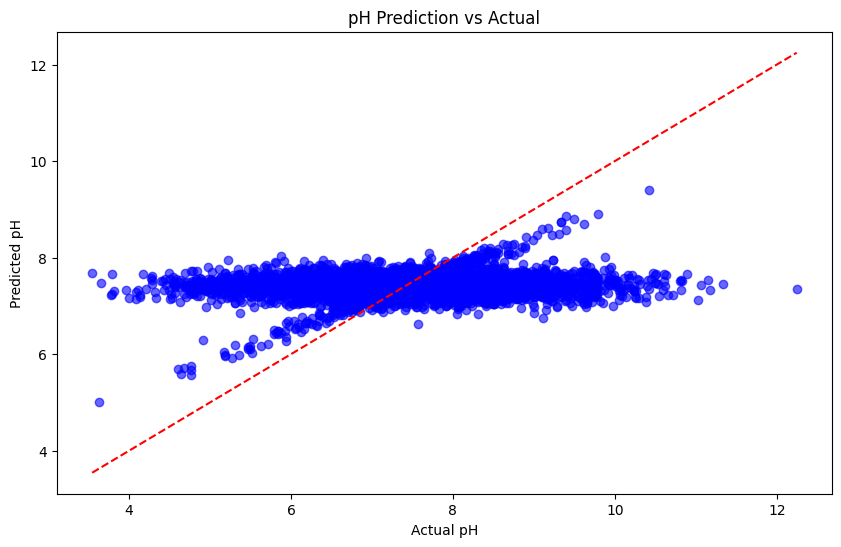

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_ph, ph_predictions, alpha=0.6, color= 'blue')
plt.plot([y_test_ph.min(), y_test_ph.max()], [y_test_ph.min(), y_test_ph.max()], '--', color='red')
plt.title('pH Prediction vs Actual')
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.show()

### Feature importance for Color classification

In [17]:
importances = classifier.feature_importances_
feature_name = features.columns
sorted_indices = np.argsort(importances)[::-1]

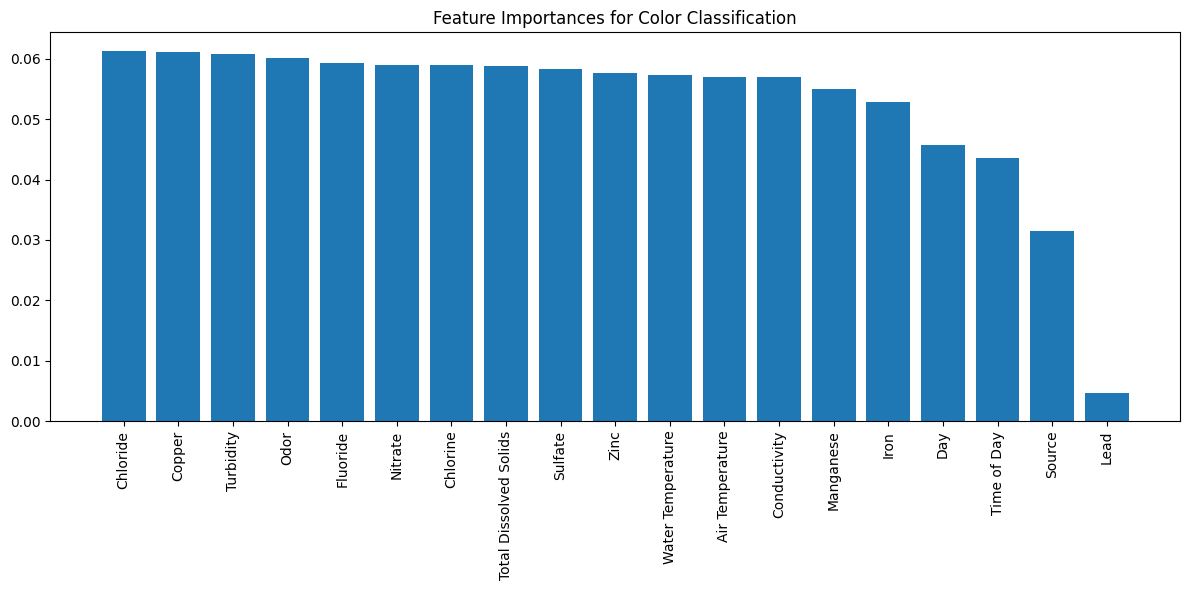

In [18]:
plt.figure(figsize=(12, 6))
plt.title('Feature Importances for Color Classification')
plt.bar(range(features.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(features.shape[1]), features.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()